# Part I - Dataset Exploration: Loan Data from Prosper
## by Duc Truong

## Introduction
> Introduce the dataset: The Prosper Loan dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. There is a data dictionary that explains all variables in this dataset.


## Preliminary Wrangling


In [1]:
# Import all packages needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
! pip install -U seaborn
import seaborn as sb 
%matplotlib inline

Requirement already up-to-date: seaborn in /opt/conda/lib/python3.6/site-packages (0.11.2)


> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.

In [2]:
# Load the dataset and check all columns
df = pd.read_csv('prosperLoanData.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [3]:
# Keep some necessary columns
main_columns =  [
    'Term', 'LoanStatus', 'BorrowerRate', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'EmploymentStatus',
    'DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount',
    'LoanOriginationDate', 'Recommendations', 'Investors'
]

In [4]:
# Create table with necessary columns and display
main_table = df[main_columns]
main_table.head()

,Term,LoanStatus,BorrowerRate,ProsperRating (Alpha),ListingCategory (numeric),EmploymentStatus,DelinquenciesLast7Years,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,LoanOriginationDate,Recommendations,Investors
0,36,Completed,0.1580,NaN,0,Self-employed,4.0,3083.333333,NaN,9425,2007-09-12 00:00:00,0,258
1,36,Current,0.0920,A,2,Employed,0.0,6125.000000,NaN,10000,2014-03-03 00:00:00,0,1
2,36,Completed,0.2750,NaN,0,Not available,0.0,2083.333333,NaN,3001,2007-01-17 00:00:00,0,41
3,36,Current,0.0974,A,16,Employed,14.0,2875.000000,NaN,10000,2012-11-01 00:00:00,0,158
4,36,Current,0.2085,D,2,Employed,0.0,9583.333333,1.0,15000,2013-09-20 00:00:00,0,20


In [5]:
main_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
BorrowerRate                 113937 non-null float64
ProsperRating (Alpha)        84853 non-null object
ListingCategory (numeric)    113937 non-null int64
EmploymentStatus             111682 non-null object
DelinquenciesLast7Years      112947 non-null float64
StatedMonthlyIncome          113937 non-null float64
TotalProsperLoans            22085 non-null float64
LoanOriginalAmount           113937 non-null int64
LoanOriginationDate          113937 non-null object
Recommendations              113937 non-null int64
Investors                    113937 non-null int64
dtypes: float64(4), int64(5), object(4)
memory usage: 11.3+ MB


In [6]:
# Prosper Rating is applied for loans after July 2009, so rows with missing value in ProsperRating column are dropped
main_table = main_table.dropna(subset=['ProsperRating (Alpha)']).reset_index()

In [7]:
# Convert 'LoanOriginationDate' into datetime datatype
main_table['LoanOrginationDate'] = pd.to_datetime(main_table['LoanOriginationDate'])

In [8]:
# TotalProsperLoans column has missing values (NaN), so replace them with 0
main_table['TotalProsperLoans'] = main_table['TotalProsperLoans'].fillna(0)

In [9]:
# Summary info of new table
main_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84853 entries, 0 to 84852
Data columns (total 15 columns):
index                        84853 non-null int64
Term                         84853 non-null int64
LoanStatus                   84853 non-null object
BorrowerRate                 84853 non-null float64
ProsperRating (Alpha)        84853 non-null object
ListingCategory (numeric)    84853 non-null int64
EmploymentStatus             84853 non-null object
DelinquenciesLast7Years      84853 non-null float64
StatedMonthlyIncome          84853 non-null float64
TotalProsperLoans            84853 non-null float64
LoanOriginalAmount           84853 non-null int64
LoanOriginationDate          84853 non-null object
Recommendations              84853 non-null int64
Investors                    84853 non-null int64
LoanOrginationDate           84853 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(6), object(4)
memory usage: 9.7+ MB


In [10]:
# Some rows of new table
main_table.head()

,index,Term,LoanStatus,BorrowerRate,ProsperRating (Alpha),ListingCategory (numeric),EmploymentStatus,DelinquenciesLast7Years,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,LoanOriginationDate,Recommendations,Investors,LoanOrginationDate
0,1,36,Current,0.0920,A,2,Employed,0.0,6125.000000,0.0,10000,2014-03-03 00:00:00,0,1,2014-03-03
1,3,36,Current,0.0974,A,16,Employed,14.0,2875.000000,0.0,10000,2012-11-01 00:00:00,0,158,2012-11-01
2,4,36,Current,0.2085,D,2,Employed,0.0,9583.333333,1.0,15000,2013-09-20 00:00:00,0,20,2013-09-20
3,5,60,Current,0.1314,B,1,Employed,0.0,8333.333333,0.0,15000,2013-12-24 00:00:00,0,1,2013-12-24
4,6,36,Current,0.2712,E,1,Employed,0.0,2083.333333,0.0,3000,2013-04-18 00:00:00,0,1,2013-04-18


### What is the structure of your dataset?

> This dataset has 81 columns. Therefore, I will drop unneeded columns to focus on the main purpose of this analysis.

### What is/are the main feature(s) of interest in your dataset?

> (1) Discover which factors can be analyzed to predict borrower's default chance (default is when borrowers cannot pay the loan). And (2) which factors affect Prosper credit rating.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> (1) The Prosper rating may affect the most to predict borrower's default chance, coming next are loan amount and listing category. (2) For Prosper rating, stated monthly income and employment status are the factors that affect mainly.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


<AxesSubplot:xlabel='LoanStatus', ylabel='count'>

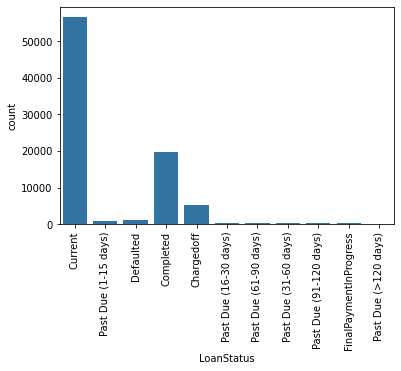

In [11]:
# Visualization 1: Check the distribution of values in LoanStatus column
base_color = sb.color_palette()[0]
plt.xticks(rotation = 90)
sb.countplot(data = main_table, x = 'LoanStatus', color = base_color)

Observation #1: Most of the loans in dataset are current loans. Loans that are past due are divided into smaller group based on their duration. The defaulted loan (my feature of interest in this dataset) only takes a small proportion of all types of loan status.

<AxesSubplot:xlabel='EmploymentStatus', ylabel='count'>

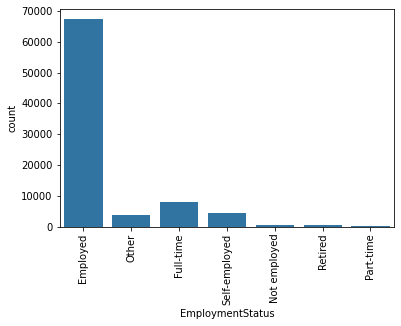

In [12]:
# Visualization 2: Check the distribution of values in EmploymentStatus column
plt.xticks (rotation = 90)
sb.countplot(data = main_table, x = 'EmploymentStatus', color = base_color)

Observation #2: A vast majority of borrowers are Employed. Coming next are Full-time and Self-employed.

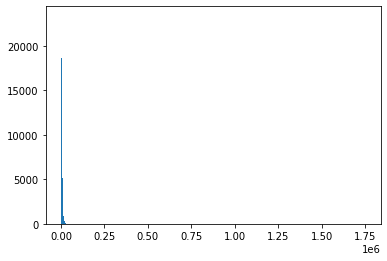

In [13]:
# Visualization 3: Check the distribution of values in StatedMonthlyIncome column
plt.hist(data = main_table, x = 'StatedMonthlyIncome', bins = 1000);

Observation #3: The distribution of StatedMonthlyIncome has skew to the right problem.

In [14]:
# Calculate mean and standard deviation. Apply Three-Sigma Limit formula for statistical control to set a limit value
income_std = main_table['StatedMonthlyIncome'].std()
income_mean = main_table['StatedMonthlyIncome'].mean()
limit = income_mean + income_std * 3
# Count the number of values that exceed the limit. Those outliers make the histogram skewed to the right
len(main_table[main_table['StatedMonthlyIncome'] >= limit])

245

(0.0, 30651.006023351034)

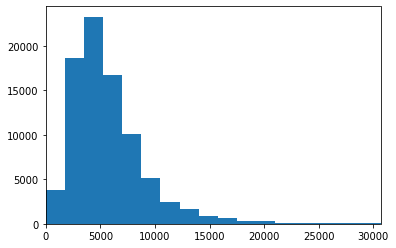

In [15]:
# Visualization 4: Check the distribution of values in StatedMonthlyIncome column again 
# after setting the limits of x-axis to the left
plt.hist(data = main_table, x = 'StatedMonthlyIncome', bins=1000);
plt.xlim(0, limit)

Observation #4: Using Three-Sigma Limit, the stated monthly income is still pretty skewed to the right. Mode (the most frequent value) is around 5000. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> For loan status, most of the loans are current loans. For employment status, most of the borrowers are employed. For the monthly stated income, the most frequent value is around 5000, but the contribution is still unclear as it has many outliers that cause skew to the right, even after applying Three-Sigma Limit.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The LoanStatus has too many current loans. While this project tends to investigate the features used to predict credit default chance, we just need these values of 'LoanStatus': Completed, Defaulted, and Chargedoff (this will be changed into Defaulted for the analysis' purpose). 

In [16]:
# Keep only 3 values of column LoanStatus
condition = (main_table['LoanStatus'] == 'Completed') | (main_table['LoanStatus'] == 'Defaulted') |\
            (main_table['LoanStatus'] == 'Chargedoff')
main_table = main_table[condition]

# Set 'Chargedoff' to 'Defaulted'
def set_to_defaulted(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']

# Count the LoanStatus column after adjusting data
main_table['LoanStatus'] = main_table.apply(set_to_defaulted, axis = 1)
main_table['LoanStatus'].value_counts()

Completed    19664
Defaulted     6341
Name: LoanStatus, dtype: int64

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

<AxesSubplot:xlabel='LoanStatus', ylabel='count'>

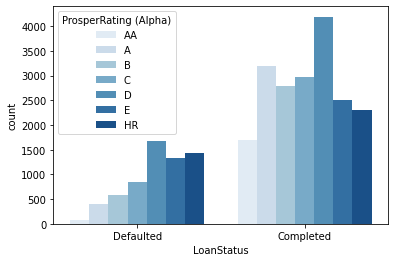

In [17]:
# Visualization 5: Display the distribution of values in ProsperRating column, categorized by 2 values of LoanStatus
sb.countplot(data = main_table, x = 'LoanStatus', hue = 'ProsperRating (Alpha)',
             hue_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR'], palette = 'Blues')

Observation #5: The most frequent rating in both completed and defaulted loans is D

In [18]:
# The next visualization 6 involves LoanStatus and ListingCategory. 
# Check all values of ListingCategory
main_table['ListingCategory (numeric)'].value_counts()

1     12740
7      4766
2      2612
3      2366
6      1204
13      597
15      370
5       274
18      214
19      198
14      181
20      171
16       94
11       63
10       44
8        40
9        28
12       19
17       17
0         7
Name: ListingCategory (numeric), dtype: int64

There are 2 problems of ListingCategory column: (1) All values are numeric and need to be converted into categorical for better understanding, (2) Too many values that make the viz become complicated, so some of them need to be removed. In this case, we just keep the values that have high frequency: 1, 2, 3, 6, and the rest will be put in the same category 7, as value 7 is 'Other'. 

In [19]:
# Turn categories with value 1,2,3,6 into categorical name, and put all other value into 7
categories = {1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 6: 'Auto', 7: 'Other'}
def refine_categories(row):
    list_category = row['ListingCategory (numeric)']
    if list_category in categories:
        return categories[list_category]
    else:
        return categories[7]
main_table['ListingCategory (numeric)'] = main_table.apply(refine_categories, axis = 1)
main_table['ListingCategory (numeric)'].value_counts()

Debt Consolidation    12740
Other                  7083
Home Improvement       2612
Business               2366
Auto                   1204
Name: ListingCategory (numeric), dtype: int64

<AxesSubplot:xlabel='LoanStatus', ylabel='count'>

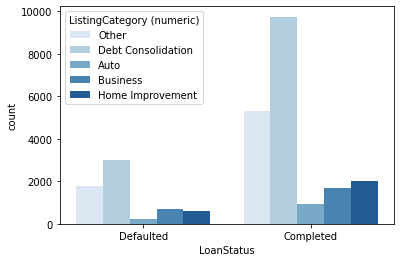

In [20]:
# Visualization 6: Display the distribution of values in ListingCategory column, categorized by 2 values of LoanStatus
sb.countplot(data = main_table, x = 'LoanStatus', hue = 'ListingCategory (numeric)', palette = 'Blues')

Observation #6: The Debt Consolidation is the most frequent value in ListingCategory column

<AxesSubplot:xlabel='ProsperRating (Alpha)', ylabel='count'>

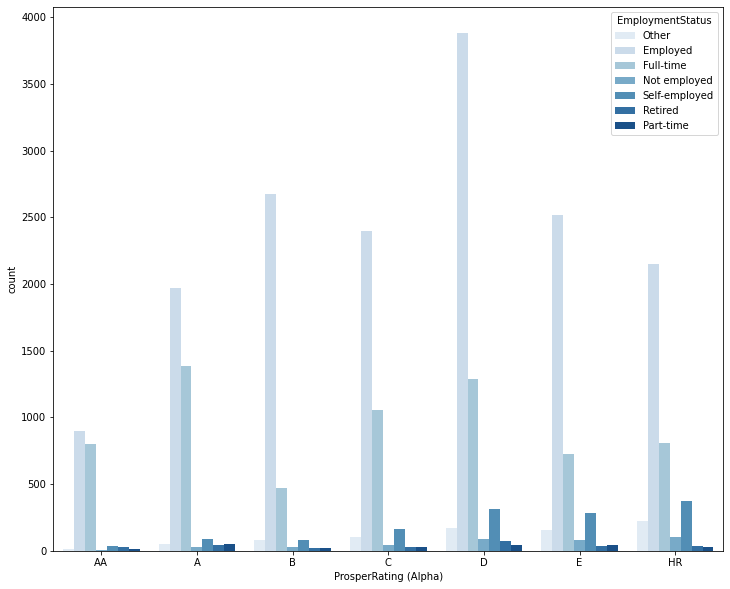

In [21]:
# Visualization 7: Display the distribution of values in EmploymentStatus, categorized by values of ProsperRating
plt.figure(figsize = [12, 10])
sb.countplot(data = main_table, x = 'ProsperRating (Alpha)', hue = 'EmploymentStatus', palette = 'Blues',
            order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR'])

Observation #7: For all rating scores, Employed is the largest group. The Not employed, Self-employed, Retired and Part-time groups have higher counts in rating HR, D, and E than high ratings. 

<AxesSubplot:xlabel='LoanStatus', ylabel='LoanOriginalAmount'>

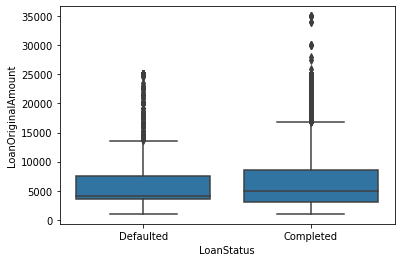

In [22]:
# Visualization 8: Display the distribution of values in LoanOriginalAmount, categorized by 2 values of LoanStatus
sb.boxplot(data = main_table, x = 'LoanStatus', y = 'LoanOriginalAmount', color = base_color)

Observation #8: For defaulted loans, the loan original amount is smaller than completed loans. Most of the loans have the original amount of around 5000-8000$.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> For completed loans, A ratings appear more frequently than other ratings (except D). The Employment Status of Not employed, Self-employed, Retired and Part-time have a lot more people receiving low ratings (D and E) than higher ratings. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> For completed loans, the listing category of home improvement appears more frequently than business; while for defaulted loans, home improvement appears less frequently than business.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

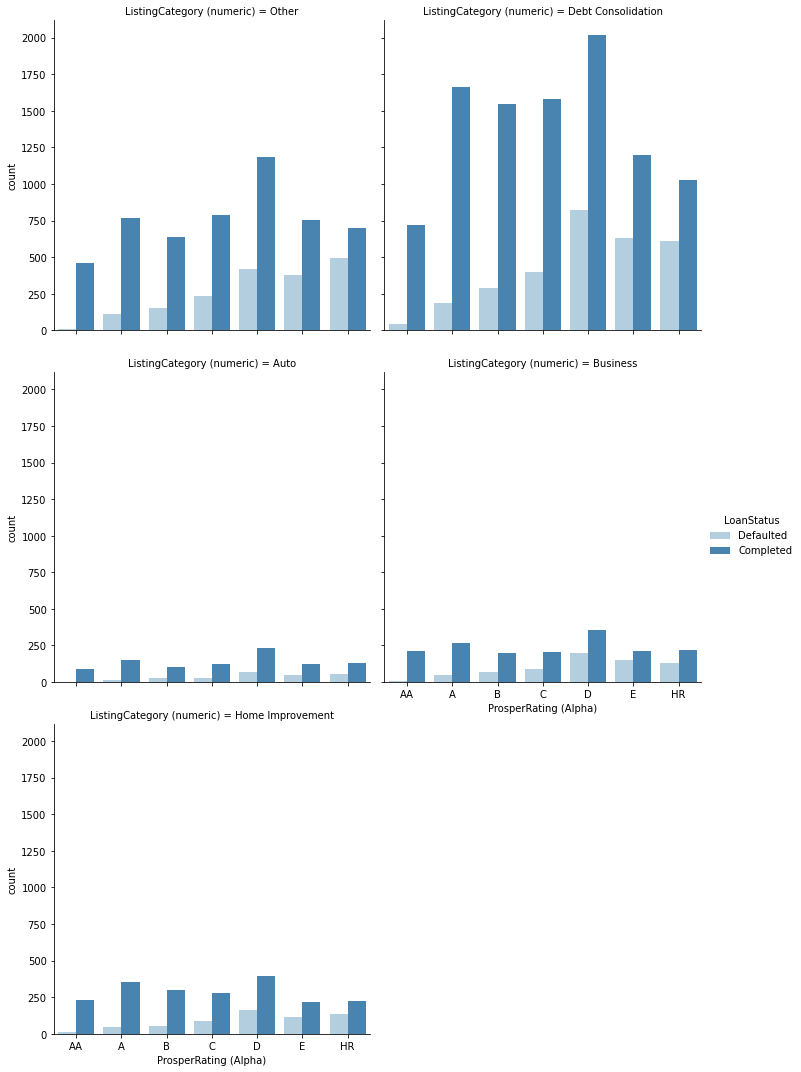

In [23]:
# Visualization 9-13: Display the distribution of values in ProsperRating, categorized by LoanStatus (2 colors 
# of columns) and ListingCategory (5 tables)
sb.catplot(data = main_table, x = 'ProsperRating (Alpha)', hue = 'LoanStatus', col = 'ListingCategory (numeric)',
           order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR'], kind = 'count', palette = 'Blues', col_wrap = 2)

Observation 9-13: D rating is the most frequent value in any listing categories. Defaulted loans appear more frequently in HR, D, and E ratings.

<AxesSubplot:xlabel='ProsperRating (Alpha)', ylabel='LoanOriginalAmount'>

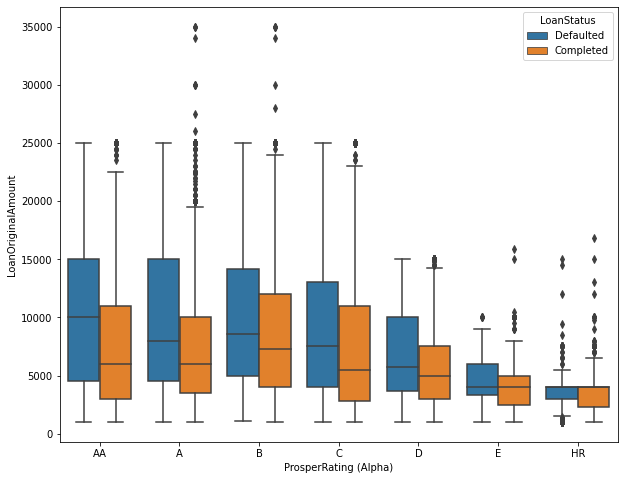

In [24]:
# Visualization 14: Display the distribution of values in LoanOriginalAmount, categorized by LoanStatus (2 colors 
# of columns) and ProsperRating (x-axis)
plt.figure(figsize = [10,8])
sb.boxplot(data = main_table, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'LoanStatus',
          order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR'])

Observation #14: All defaulted loans have the maximum loan original amount of 25000. While completed loans have higher range of loan amount, the defaulted loans have higher density in the range of 5000-15000$

(0.0, 30651.006023351034)

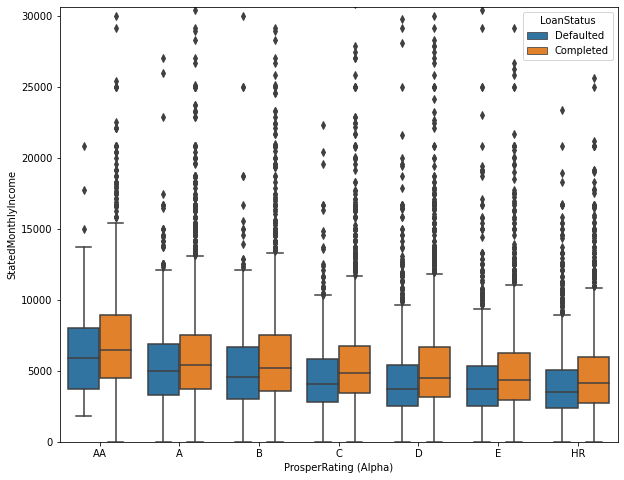

In [25]:
# Visualization 15: Display the distribution of values in StatedMonthlyIncome, categorized by LoanStatus (2 colors 
# of columns) and ProsperRating (x-axis)
plt.figure(figsize = [10,8])
sb.boxplot(data = main_table, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'LoanStatus',
          order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR'])
plt.ylim(0, limit)

Observation #15: The borrowers who have defaulted loans tend to have lower income than the ones who have completed loans

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The defaulted loans appear more frequently for borrowers with low ratings (HR, D, E). The borrowers with low ratings often have lower loan amount (less than 15000) than the ones with higher ratings (with a lot reach 25000)

### Were there any interesting or surprising interactions between features?

> In all listing categories, defaulted loans have smaller loan amount than completed ones.

## Conclusions
> Since my features of interest are factors that affect default chance and Prosper ratings, some key findings are:
- The listing category of Debt Consolidation appears most frequently in defaulted loans (visualization 6). I separate it into 2 LoanStatus, and both in defaulted and completed loans, the Debt Consolidation is always the highest count.
- The borrowers that have low ratings are mostly Not employed, Self-employed, Retired, and Part-time (visualization 7).
- Borrowers who have high income tend to complete their loans (visualization 15). In all ratings, borrowers with completed loans always have higher income than the ones with defaulted loans.